### Cluster Analysis - K-means

Cluster analysis is a multivariate statistical technique that gropus observations on the basis some of their features or variables they are described by

Observations in datasets can be divided in groups

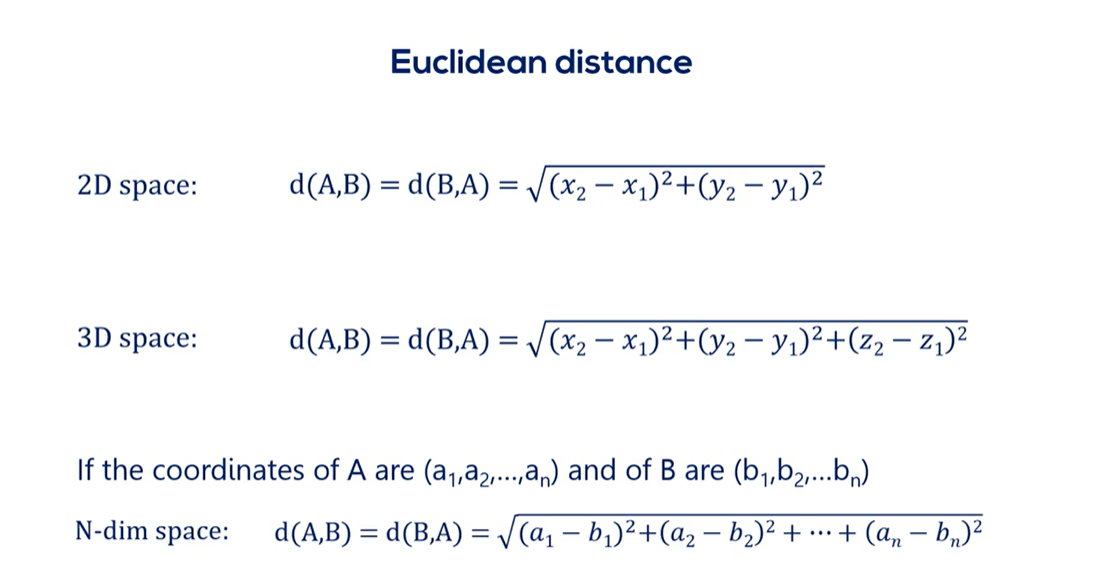

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
raw_data = pd.read_csv(r'C:\Users\fxgibert\Desktop\Python\PythonProject\CSV\3.01.+Country+clusters.csv')
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


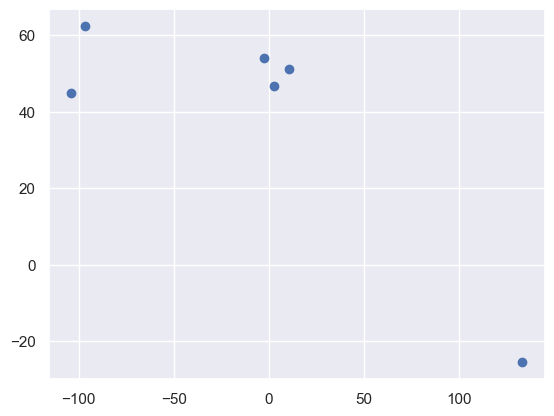

In [6]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])

In [8]:
# We are going to select the latitude and longitude for location
# Using the DataFrame.iloc(row indices, column indices)
# slices the data frame given rows and columns to be kept.
x = raw_data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [22]:
#Clustering
kmeans = KMeans(3)

In [23]:
kmeans.fit(x)


C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [24]:
kmeans.max_iter

300

In [25]:
#Clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 1, 1, 1, 0])

In [26]:
data_with_clusters = raw_data
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


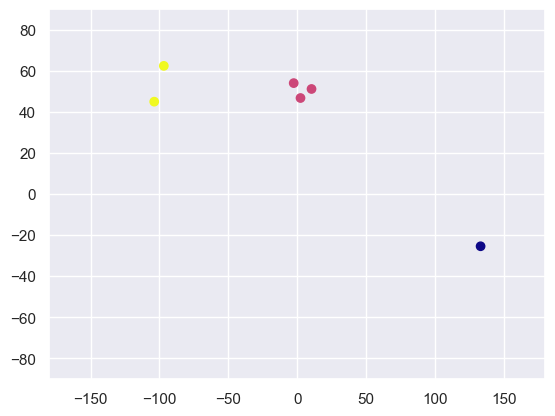

In [27]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap = 'plasma')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Clustering Categorial Data

In [73]:
data_mapped = raw_data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


In [74]:
# Select the features
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [75]:
kmeans = KMeans(3)
kmeans.fit(x)

C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [76]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, 1, 1, 2])

In [77]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


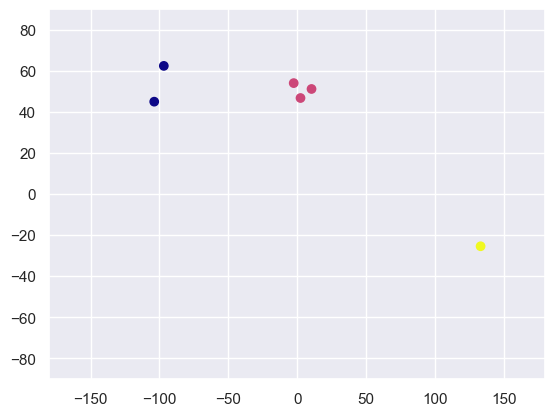

In [78]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap = 'plasma')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### How to Choose the number of clusters

Objectives:
- Minimizing the distance between points in a cluster
- Maximizing the distance between clusters

The elbow method is the method of how to choose the number of clusters. WCSS declines extremely fast and it gets to the elbow. We need K and WCSS for a specific K

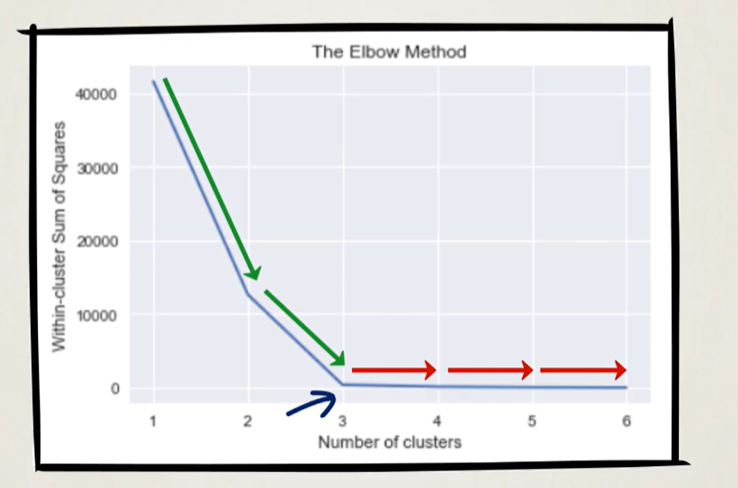

Distance between points in a cluster WCSS (objective: minimize it to achieve the perfect clustering solution)

WCSS as low as possible

For N observations, the small amount of clusters, the better

In [79]:
#WCSS
kmeans.inertia_

290.10523333333333

In [80]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\fxgibert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

In [81]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

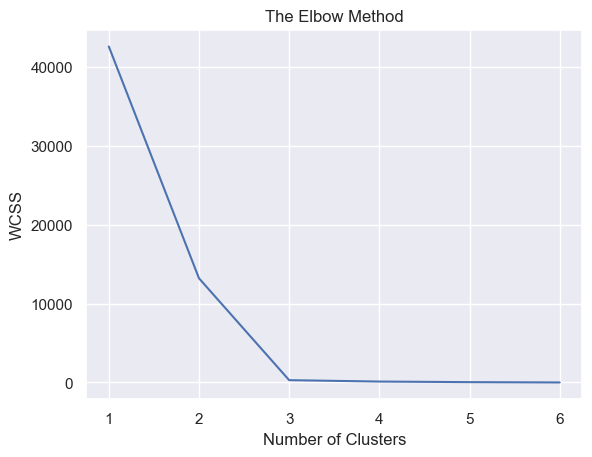

In [82]:
##The Elbow Method
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is **3**

##### PROS: 
- Simple to understand
- Fast to cluster
- Widely available
- Easy to implement
- Always yields a result

##### CONS:

- We need to pick the K value (**Remedies:** Use the elbow method)
- Sensitive to initialization of the clusters (**Remedies:** KMeans ++ it is an algorithm that runs prior to KMeans to find a good initialization position for the centroids)
- KMeans is sensitive to outliers (**Remedies:** Remove outliers)
- KMeans produces spherical solutions 
- Standardization

##### Standardization

The aim is to reduce weight of the higher numbers. It is trying to put everything on the same scale.

